In [2]:
import re
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 读文件，获取HTTP Request语句

list_all = []

for filename in ['nohup.txt', 'nohup2.txt']:
    with open(filename, "r", encoding="utf-8") as f:
        while True:
            fr = f.readline()
            if not fr:
                break
            if (re.search('POST /save_score', fr) != None):
                list_all.append(fr)
            
print(len(list_all))
list_all[:5]

1474774


['120.242.44.63 - - [01/Sep/2023 11:53:21] "POST /save_score?win_name=假日威龙陈&lose_name=迷迭香&code=132 HTTP/1.1" 200 -\n',
 '36.112.108.194 - - [01/Sep/2023 11:53:22] "POST /save_score?win_name=铃兰&lose_name=归溟幽灵鲨&code=981 HTTP/1.1" 200 -\n',
 '120.242.44.63 - - [01/Sep/2023 11:53:23] "POST /save_score?win_name=玛恩纳&lose_name=远牙&code=337 HTTP/1.1" 200 -\n',
 '183.199.140.162 - - [01/Sep/2023 11:53:23] "POST /save_score?win_name=归溟幽灵鲨&lose_name=陈&code=346 HTTP/1.1" 200 -\n',
 '120.204.183.204 - - [01/Sep/2023 11:53:24] "POST /save_score?win_name=琴柳&lose_name=远牙&code=717 HTTP/1.1" 200 -\n']

In [4]:
# 切分字符串，匹配各数据项

ip_all = []
time_all = []
win_name_all = []
lose_name_all = []
code_all = []

for _ in list_all:
    try:
        this_ip = _.split(' - - ')[0]
        this_time = _.split('[')[1].split(']')[0].replace('Sep', '09').replace('Oct', '10')
        this_win_name = _.split('win_name=')[1].split('&lose_name=')[0]
        this_lose_name = _.split('&lose_name=')[1].split('&code')[0]
        this_code = _.split('&code=')[1].split(' HTTP/1.1')[0]
    except IndexError:
        continue

    ip_all.append(this_ip)
    time_all.append(this_time)
    win_name_all.append(this_win_name)
    lose_name_all.append(this_lose_name)
    code_all.append(this_code)

print(ip_all[:5])
print(time_all[:5])
print(win_name_all[:5])
print(lose_name_all[:5])
print(code_all[:5])

print(len(ip_all))
print(len(time_all))
print(len(win_name_all))
print(len(lose_name_all))
print(len(code_all))

['120.242.44.63', '36.112.108.194', '120.242.44.63', '183.199.140.162', '120.204.183.204']
['01/09/2023 11:53:21', '01/09/2023 11:53:22', '01/09/2023 11:53:23', '01/09/2023 11:53:23', '01/09/2023 11:53:24']
['假日威龙陈', '铃兰', '玛恩纳', '归溟幽灵鲨', '琴柳']
['迷迭香', '归溟幽灵鲨', '远牙', '陈', '远牙']
['132', '981', '337', '346', '717']
1468016
1468016
1468016
1468016
1468016


In [5]:
# 数据由list写入dataframe，并做数据清洗

DICT_NAME = {
    "能天使": 0,
    "推进之王": 1,
    "伊芙利特": 2,
    "艾雅法拉": 3,
    "安洁莉娜": 4,
    "闪灵": 5,
    "夜莺": 6,
    "星熊": 7,
    "塞雷娅": 8,
    "银灰": 9,
    "斯卡蒂": 10,
    "陈": 11,
    "黑": 12,
    "赫拉格": 13,
    "麦哲伦": 14,
    "莫斯提马": 15,
    "煌": 16,
    "阿": 17,
    "年": 18,
    "刻俄柏": 19,
    "风笛": 20,
    "傀影": 21,
    "温蒂": 22,
    "W": 23,
    "早露": 24,
    "铃兰": 25,
    "棘刺": 26,
    "森蚺": 27,
    "史尔特尔": 28,
    "瑕光": 29,
    "泥岩": 30,
    "迷迭香": 31,
    "山": 32,
    "空弦": 33,
    "嵯峨": 34,
    "夕": 35,
    "灰烬": 36,
    "异客": 37,
    "歌蕾蒂娅": 38,
    "凯尔希": 39,
    "浊心斯卡蒂": 40,
    "卡涅利安": 41,
    "帕拉斯": 42,
    "水月": 43,
    "假日威龙陈": 44,
    "琴柳": 45,
    "远牙": 46,
    "焰尾": 47,
    "耀骑士临光": 48,
    "灵知": 49,
    "老鲤": 50,
    "令": 51,
    "澄闪": 52,
    "菲亚梅塔": 53,
    "号角": 54,
    "流明": 55,
    "艾丽妮": 56,
    "归溟幽灵鲨": 57,
    "黑键": 58,
    "多萝西": 59,
    "鸿雪": 60,
    "百炼嘉维尔": 61,
    "玛恩纳": 62,
    "白铁": 63,
    "伺夜": 64,
    "斥罪": 65,
    "缄默德克萨斯": 66,
    "焰影苇草": 67,
    "林": 68,
    "重岳": 69,
    "仇白": 70,
    "麒麟R夜刀": 71,
    "伊内丝": 72,
    "淬羽赫默": 73,
    "霍尔海雅": 74,
    "缪尔赛思": 75,
    "圣约送葬人": 76,
    "提丰": 77,
    "琳琅诗怀雅": 78,
    "纯烬艾雅法拉": 79,
    "涤火杰西卡": 80,
}
LIST_NAME = list(DICT_NAME.keys())

df = pd.DataFrame({
    'ip': ip_all,
    'time': pd.to_datetime(time_all, format='%d/%m/%Y %H:%M:%S'),
    'win_name': win_name_all,
    'lose_name': lose_name_all,
    'code': code_all
})

df = df[df['ip'] != '119.59.173.118']
df = df[df.apply(lambda _: _['win_name'] in LIST_NAME and _['lose_name'] in LIST_NAME, axis=1)].reset_index(drop=True)
df['win_id'] = df['win_name'].map(DICT_NAME)
df['lose_id'] = df['lose_name'].map(DICT_NAME)
df

,ip,time,win_name,lose_name,code,win_id,lose_id
0,120.242.44.63,2023-09-01 11:53:21,假日威龙陈,迷迭香,132,44,31
1,36.112.108.194,2023-09-01 11:53:22,铃兰,归溟幽灵鲨,981,25,57
2,120.242.44.63,2023-09-01 11:53:23,玛恩纳,远牙,337,62,46
3,183.199.140.162,2023-09-01 11:53:23,归溟幽灵鲨,陈,346,57,11
4,120.204.183.204,2023-09-01 11:53:24,琴柳,远牙,717,45,46
...,...,...,...,...,...,...,...
1366476,110.65.147.230,2023-10-17 00:24:51,莫斯提马,仇白,314,15,70
1366477,110.65.147.230,2023-10-17 00:40:06,刻俄柏,异客,460,19,37
1366478,110.65.147.230,2023-10-17 00:48:48,麒麟R夜刀,焰尾,700,71,47
1366479,110.65.147.237,2023-10-17 01:31:49,假日威龙陈,缄默德克萨斯,713,44,66


In [6]:
# 检查来自某一个IP的数据

# gb_ip = df.groupby('ip')
# list_vote_num = []

# for _ in gb_ip:
#     curr = _
#     if _[0] == '119.59.173.118':
#     # if len(_[1]) == 100041:
#         break

# curr[1]
# list(curr[1]['time'])
# list(zip(list(curr[1]['win_name']), list(curr[1]['lose_name'])))
# # curr[0] # '119.59.173.118'

In [7]:
# 按ip对数据分组

gb_ip = df.groupby('ip')
dict_ip_to_vote_num = {}
list_vote_num = []

for _ in gb_ip:
    list_vote_num.append(len(_[1]))
    dict_ip_to_vote_num[_[0]] = len(_[1])

list_vote_num.sort(reverse=True)

print('有效投票总量：')
print(sum(list_vote_num))
print()

print('投票数量前十的ip的投票数量：')
print(list_vote_num[:10])
print()

print('参与本投票箱的ip总数：')
print(len(list_vote_num))
print()

print('平均每个ip投票数量：')
print('%.2f' % (sum(list_vote_num) / len(list_vote_num)))
print()

df['ip_vote_num'] = df['ip'].map(dict_ip_to_vote_num)
del df['ip']
df.to_csv('final_data.csv')
df

有效投票总量：
1366481

投票数量前十的ip的投票数量：
[4889, 4807, 3872, 2773, 2102, 2028, 1907, 1463, 1404, 1372]

参与本投票箱的ip总数：
22059

平均每个ip投票数量：
61.95



,time,win_name,lose_name,code,win_id,lose_id,ip_vote_num
0,2023-09-01 11:53:21,假日威龙陈,迷迭香,132,44,31,13
1,2023-09-01 11:53:22,铃兰,归溟幽灵鲨,981,25,57,594
2,2023-09-01 11:53:23,玛恩纳,远牙,337,62,46,13
3,2023-09-01 11:53:23,归溟幽灵鲨,陈,346,57,11,74
4,2023-09-01 11:53:24,琴柳,远牙,717,45,46,512
...,...,...,...,...,...,...,...
1366476,2023-10-17 00:24:51,莫斯提马,仇白,314,15,70,1126
1366477,2023-10-17 00:40:06,刻俄柏,异客,460,19,37,1126
1366478,2023-10-17 00:48:48,麒麟R夜刀,焰尾,700,71,47,1126
1366479,2023-10-17 01:31:49,假日威龙陈,缄默德克萨斯,713,44,66,364


In [8]:
# 按胜负干员对数据分组，以统计每位干员的加权得票数

df['weight'] = df['ip_vote_num'].map(lambda _: 1 if _ < 62 else 62 / _)

win_count = [sum(_[1]['weight']) for _ in df.groupby('win_id')]
lose_count = [sum(_[1]['weight']) for _ in df.groupby('lose_id')]
net_win_score = [win_count[_] - lose_count[_] for _ in range(len(win_count))]
win_rate = [win_count[_] / (win_count[_] + lose_count[_]) * 100 for _ in range(len(win_count))]

dict_score = dict(zip(zip(LIST_NAME, net_win_score), win_rate))

final_n_s, final_rate = zip(*sorted(dict_score.items(), key=lambda _: -_[1]))
final_name, final_score = zip(*final_n_s)
final_rate = ['%.1f'%_ + ' %' for _ in final_rate]
# return jsonify({'name': final_name, 'rate': final_rate, 'score': final_score, 'count': '已收集数据 ' + str(sum(lst_win_score)) + ' 条'})

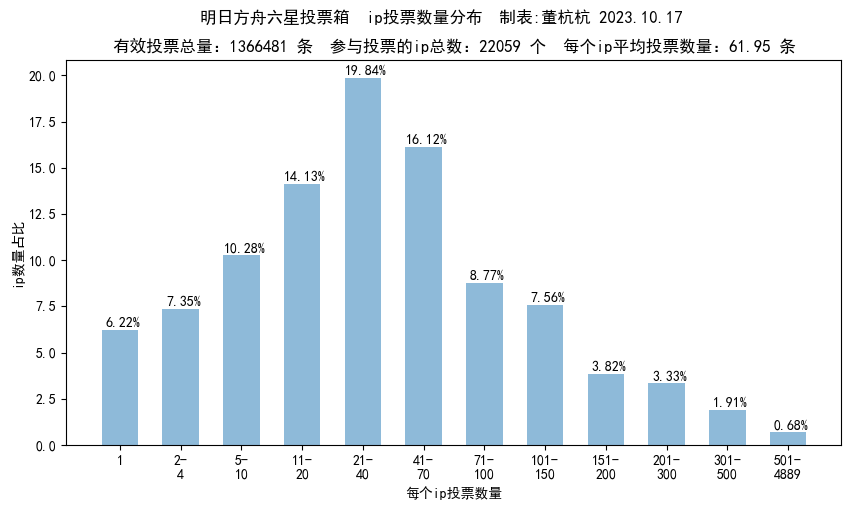

In [13]:
# 生成可视化图表

tier = [0, 1, 4, 10, 20, 40, 70, 100, 150, 200, 300, 500, list_vote_num[0]]
tier_cnt = []

labels = [str(tier[_]+1) + '-\n' + str(tier[_+1]) for _ in  range(len(tier) - 1)]
labels[0] = '1'


for i in range(len(tier) - 1):
    tier_cnt.append(len([_ for _ in list_vote_num if tier[i] < _ and _ <= tier[i+1]]) / len(list_vote_num) * 100)

plt.figure(figsize=(10, 5))
plt.bar(range(len(tier_cnt)), tier_cnt, width=0.6, align='center', alpha=0.5, tick_label=labels)


plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False
plt.xlabel('每个ip投票数量')
plt.ylabel('ip数量占比')
plt.suptitle('明日方舟六星投票箱  ip投票数量分布  制表:董杭杭 2023.10.17')
plt.title('有效投票总量：1366481 条  参与投票的ip总数：22059 个  每个ip平均投票数量：61.95 条')

for x, y, z in zip(range(len(tier_cnt)), tier_cnt, ('%.2f'%_ + '%' for _ in tier_cnt)):
    plt.text(x+0.05, y+0.05, z, ha='center',va='bottom')